# Information from Kaggle

The following information is directly copied from this dataset's <a href='https://www.kaggle.com/matheusfreitag/gas-prices-in-brazil' target='_blank'>Kaggle Page</a>.

<h2>The Data</h2>

<p>The National Agency of Petroleum, Natural Gas and Bio fuels (<em>ANP</em> in Portuguese) releases weekly reports of gas, diesel and other fuels prices used in transportation across the country. These datasets bring the mean value per liter, number of gas stations analyzed and other information grouped by regions and states across the country.</p>

<h2>Source</h2>

<p>As stated before, these datasets are provided by ANP, and are regularly updated with new dates and information - which can be retrieved <a href="http://www.anp.gov.br/precos-e-defesa-da-concorrencia/precos/levantamento-de-precos/serie-historica-do-levantamento-de-precos-e-de-margens-de-comercializacao-de-combustiveis" rel="nofollow">here</a> (in portuguese).</p>

<h2>What can be done with this?</h2>

<ul>
<li>How different regions of Brazil saw their gas prices change?</li>
<li>Within a region, which states increased more their prices?</li>
<li>Which states are the cheapest (or most expensive) for different types of fuels?</li>
</ul>

<a href='https://www.kaggle.com/matheusfreitag/gas-prices-in-brazil' target='_blank'>Kaggle Link</a>

# Importing the libraries

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
sns.set()

# Ignoring warnings
warnings.simplefilter('ignore')

Loading the dataset into a pandas dataframe.

In [2]:
data = pd.read_table('2004-2019.tsv', parse_dates=[1, 2])
df = data.copy()

df.head()

,Unnamed: 0,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,...,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,...,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,...,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,...,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,...,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,...,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


# Data Wrangling

## Deleting the unneccesary column "Unnamed: 0"

In [3]:
df.drop(axis=1, columns=['Unnamed: 0'], inplace=True)
df.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,MÊS,ANO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


## Renaming the column names from portuguese to English

In [4]:
list(df.columns)

['DATA INICIAL',
 'DATA FINAL',
 'REGIÃO',
 'ESTADO',
 'PRODUTO',
 'NÚMERO DE POSTOS PESQUISADOS',
 'UNIDADE DE MEDIDA',
 'PREÇO MÉDIO REVENDA',
 'DESVIO PADRÃO REVENDA',
 'PREÇO MÍNIMO REVENDA',
 'PREÇO MÁXIMO REVENDA',
 'MARGEM MÉDIA REVENDA',
 'COEF DE VARIAÇÃO REVENDA',
 'PREÇO MÉDIO DISTRIBUIÇÃO',
 'DESVIO PADRÃO DISTRIBUIÇÃO',
 'PREÇO MÍNIMO DISTRIBUIÇÃO',
 'PREÇO MÁXIMO DISTRIBUIÇÃO',
 'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
 'MÊS',
 'ANO']

In [5]:
new_column_names = [
    'analysis_first_day',
    'analysis_last_day',
    'macro_region',
    'state',
    'product_kind',
    'no_gas_stations_analyzed',
    'measurement_unit',
    'avg_price',
    'std',
    'min_price_observed',
    'max_price_observed',
    'mean_price_margin',
    'coefficient_of_variation',
    'mean_distribution_price',
    'distribution_std',
    'distribution_min_price',
    'distribution_max_price',
    'distribution_coefficient_of_variation',
    'month',
    'year'
]

df.columns = new_column_names
list(df.columns)

['analysis_first_day',
 'analysis_last_day',
 'macro_region',
 'state',
 'product_kind',
 'no_gas_stations_analyzed',
 'measurement_unit',
 'avg_price',
 'std',
 'min_price_observed',
 'max_price_observed',
 'mean_price_margin',
 'coefficient_of_variation',
 'mean_distribution_price',
 'distribution_std',
 'distribution_min_price',
 'distribution_max_price',
 'distribution_coefficient_of_variation',
 'month',
 'year']

In [6]:
df.head()

,analysis_first_day,analysis_last_day,macro_region,state,product_kind,no_gas_stations_analyzed,measurement_unit,avg_price,std,min_price_observed,max_price_observed,mean_price_margin,coefficient_of_variation,mean_distribution_price,distribution_std,distribution_min_price,distribution_max_price,distribution_coefficient_of_variation,month,year
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133,5,2004
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115,5,2004
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098,5,2004
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143,5,2004
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082,5,2004


## Check for any null value

In [7]:
df.isnull().sum()

analysis_first_day                       0
analysis_last_day                        0
macro_region                             0
state                                    0
product_kind                             0
no_gas_stations_analyzed                 0
measurement_unit                         0
avg_price                                0
std                                      0
min_price_observed                       0
max_price_observed                       0
mean_price_margin                        0
coefficient_of_variation                 0
mean_distribution_price                  0
distribution_std                         0
distribution_min_price                   0
distribution_max_price                   0
distribution_coefficient_of_variation    0
month                                    0
year                                     0
dtype: int64

We have no null value so no need to worry about it 'yet'.

## Number of Rows and Columns

In [8]:
print('Number of rows:   ', df.shape[0])
print('Number of Columns:', df.shape[1])

Number of rows:    106823
Number of Columns: 20


## Let's check the summary statistics

In [9]:
df.describe()

,no_gas_stations_analyzed,avg_price,std,min_price_observed,max_price_observed,coefficient_of_variation,month,year
count,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000,106823.000000
mean,233.770976,10.870780,0.657227,9.416038,12.537731,0.045418,6.484006,2011.802271
std,403.282519,17.752533,1.349169,15.092193,20.841497,0.025066,3.443391,4.391530
min,1.000000,0.766000,0.000000,0.590000,0.999000,0.000000,1.000000,2004.000000
25%,42.000000,2.072000,0.072000,1.900000,2.310000,0.029000,4.000000,2008.000000
50%,104.000000,2.718000,0.114000,2.510000,2.999000,0.041000,6.000000,2012.000000
75%,243.000000,3.752000,0.191000,3.499000,4.150000,0.058000,9.000000,2016.000000
max,4167.000000,99.357000,10.748000,90.000000,120.000000,0.395000,12.000000,2019.000000


We can see that the price column is right skewed because mean is greater than the 50% quartile (or median). This information may come in handy later.

## Datatypes

In [10]:
df.dtypes.to_frame(name='Data Type')

,Data Type
analysis_first_day,datetime64[ns]
analysis_last_day,datetime64[ns]
macro_region,object
state,object
product_kind,object
no_gas_stations_analyzed,int64
measurement_unit,object
avg_price,float64
std,float64
min_price_observed,float64


Let's check some of the datatypes which are object and should be numerical.

In [11]:
check_df = (df.dtypes == np.object).reset_index()
check_df[check_df[0] == True]['index'].reset_index().drop('level_0', axis=1)

,index
0,macro_region
1,state
2,product_kind
3,measurement_unit
4,mean_price_margin
5,mean_distribution_price
6,distribution_std
7,distribution_min_price
8,distribution_max_price
9,distribution_coefficient_of_variation


Data types of the following columns should be numerical but are of type object:<br>
* mean_price_margin
* mean_distribution_price
* distribution_std
* distribution_min_price
* distribution_max_price
* distribution_coefficient_of_variation

### Dealing with the column: mean_price_margin

Let's first check the unique values.

In [12]:
df.mean_price_margin.unique()

array(['0.463', '0.399', '0.419', ..., '1.007', '0.876', '1.179'],
      dtype=object)

Now, let's check if there is a value other than floats.

In [13]:
def is_float(n):
    try:
        float(n)
        return True
    except ValueError:
        return False

In [14]:
df.mean_price_margin[~df.mean_price_margin.apply(lambda x: is_float(x))].unique()

array(['-'], dtype=object)

Let's check the ratio of "-" appearing in the table as compared to the all rows to decide how to replace it.

In [15]:
appearance = df.mean_price_margin[~df.mean_price_margin.apply(lambda x: is_float(x))].value_counts().iloc[0]
total_entries = df.shape[0]
perc_of_occurance = (appearance / total_entries) * 100

print('Number of times "-" appeared:', appearance)
print('Total number of entries:     ', total_entries)
print('Percentage of occurance:     ', round(perc_of_occurance, 2), '%')

Number of times "-" appeared: 3431
Total number of entries:      106823
Percentage of occurance:      3.21 %


Since, that is about only 3.2 percent of the total data. We might as well delete these entire rows instead of replacing them with any value.

In [16]:
df = df[df.mean_price_margin.apply(lambda x: is_float(x))]

Now, converting all the values of this column into float.

In [17]:
df.mean_price_margin = df.mean_price_margin.apply(lambda x: float(x))
df.mean_price_margin.dtypes

dtype('float64')

### Dealing with the column: mean_distribution_price

Let's first check the unique values.

In [18]:
df.mean_distribution_price.unique()

array(['0.825', '0.763', '0.97', ..., '49.214', '54.078', '57.05'],
      dtype=object)

Let's check if there are any values other than floats.

In [19]:
df.mean_distribution_price[~df.mean_distribution_price.apply(lambda x: is_float(x))].unique()

array([], dtype=object)

There are no values other than floats (in string representation). Converting all the string representations of floats to actual floats.

In [20]:
df.mean_distribution_price = df.mean_distribution_price.apply(lambda x: float(x))
df.mean_distribution_price.dtypes

dtype('float64')

### Dealing with the column: distribution_std

Let's first check the unique values.

In [21]:
df.distribution_std.unique()

array(['0.11', '0.088', '0.095', ..., '5.254', '6.52', '6.906'],
      dtype=object)

Let's check if values other than floats exist in the strings.

In [22]:
df.distribution_std[~df.distribution_std.apply(lambda x: is_float(x))].unique()

array([], dtype=object)

There are no values other than floats (in string representation). Converting all the string representations of floats to actual floats.

In [23]:
df.distribution_std = df.distribution_std.apply(lambda x: float(x))
df.distribution_std.dtypes

dtype('float64')

### Dealing with the column: distribution_min_price

Let's first check the unique values.

In [24]:
df.distribution_min_price.unique()

array(['0.4201', '0.5013', '0.5614', ..., '50.68', '61.92', '40.19'],
      dtype=object)

Now, let's check if any value other than float exists.

In [25]:
df.distribution_min_price[~df.distribution_min_price.apply(lambda x: is_float(x))].unique()

array([], dtype=object)

No value other than float exists. Let's convert the values to actual floats.

In [26]:
df.distribution_min_price = df.distribution_min_price.apply(lambda x: float(x))
df.distribution_min_price.dtypes

dtype('float64')

### Dealing with the column: distribution_max_price

Let's check the unique values.

In [27]:
df.distribution_max_price.unique()

array(['0.9666', '1.05', '1.161', ..., '4.3999', '4.095', '3.825'],
      dtype=object)

Now, let's check if any value other than float exists.

In [28]:
df.distribution_max_price[~df.distribution_max_price.apply(lambda x: is_float(x))].unique()

array([], dtype=object)

Converting the values to float.

In [29]:
df.distribution_max_price = df.distribution_max_price.apply(lambda x: float(x))
df.distribution_min_price.dtypes

dtype('float64')

### Dealing with the column: distribution_coefficient_of_variation

Checking the unique values.

In [30]:
df.distribution_coefficient_of_variation.unique()

array(['0.133', '0.115', '0.098', '0.143', '0.082', '0.134', '0.062',
       '0.077', '0.096', '0.072', '0.083', '0.053', '0.153', '0.122',
       '0.06', '0.172', '0.147', '0.087', '0.168', '0.108', '0.151',
       '0.22', '0.157', '0.101', '0.119', '0.135', '0.116', '0.079',
       '0.139', '0.07', '0.054', '0.095', '0.084', '0.085', '0.149',
       '0.035', '0.059', '0.105', '0.217', '0.15', '0.123', '0.167',
       '0.111', '0.148', '0.128', '0.058', '0.088', '0.063', '0.162',
       '0.04', '0.156', '0.12', '0.08', '0.097', '0.141', '0.202',
       '0.103', '0.099', '0.164', '0.118', '0.081', '0.125', '0.091',
       '0.078', '0.106', '0.159', '0.049', '0.066', '0.126', '0.052',
       '0.221', '0.112', '0.131', '0.107', '0.138', '0.144', '0.073',
       '0.11', '0.086', '0.068', '0.136', '0.074', '0.14', '0.104',
       '0.17', '0.161', '0.093', '0.155', '0.094', '0.113', '0.064',
       '0.13', '0.109', '0.21', '0.16', '0.09', '0.163', '0.069', '0.129',
       '0.212', '0.092', 

Checking if any value other than float exists.

In [31]:
df.distribution_coefficient_of_variation[~df.distribution_coefficient_of_variation.apply(lambda x: is_float(x))] 

Series([], Name: distribution_coefficient_of_variation, dtype: object)

Converting the values to float.

In [32]:
df.distribution_coefficient_of_variation = df.distribution_coefficient_of_variation.apply(lambda x: float(x))
df.distribution_coefficient_of_variation.dtypes

dtype('float64')

### Checking the datatypes for the final time.

In [33]:
df.dtypes

analysis_first_day                       datetime64[ns]
analysis_last_day                        datetime64[ns]
macro_region                                     object
state                                            object
product_kind                                     object
no_gas_stations_analyzed                          int64
measurement_unit                                 object
avg_price                                       float64
std                                             float64
min_price_observed                              float64
max_price_observed                              float64
mean_price_margin                               float64
coefficient_of_variation                        float64
mean_distribution_price                         float64
distribution_std                                float64
distribution_min_price                          float64
distribution_max_price                          float64
distribution_coefficient_of_variation           

Now, the datatypes look fine. Let's move forward towards the EDA to find the answer to the questions given in the kaggle description.

# Exploratory Data Analysis

Let's perform EDA to find the answer to the given three questions:<br>
<ol>
<li>How different regions of Brazil saw their gas prices change?</li>
<li>Within a region, which states increased more their prices?</li>
<li>Which states are the cheapest (or most expensive) for different types of fuels?</li>
</ol>

First let's get the rows of the product type gases (GLV and GNV)

In [34]:
df = df[(df.product_kind == 'GLV') | (df.product_kind == 'GNV')]
df.head()

,analysis_first_day,analysis_last_day,macro_region,state,product_kind,no_gas_stations_analyzed,measurement_unit,avg_price,std,min_price_observed,max_price_observed,mean_price_margin,coefficient_of_variation,mean_distribution_price,distribution_std,distribution_min_price,distribution_max_price,distribution_coefficient_of_variation,month,year
36196,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,GNV,3,R$/m3,1.099,0.000,1.099,1.099,0.257,0.000,0.842,0.011,0.8347,0.8546,0.013,5,2004
36197,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,GNV,3,R$/m3,1.084,0.000,1.084,1.084,0.295,0.000,0.789,0.000,0.7888,0.7888,0.000,5,2004
36198,2004-05-09,2004-05-15,NORDESTE,BAHIA,GNV,19,R$/m3,1.079,0.000,1.079,1.079,0.374,0.000,0.705,0.136,0.4214,0.8031,0.193,5,2004
36199,2004-05-09,2004-05-15,NORDESTE,CEARA,GNV,20,R$/m3,1.184,0.001,1.180,1.184,0.354,0.001,0.830,0.096,0.6811,0.9982,0.116,5,2004
36200,2004-05-09,2004-05-15,NORDESTE,PARAIBA,GNV,8,R$/m3,1.149,0.000,1.149,1.149,0.357,0.000,0.792,0.098,0.6827,0.9071,0.124,5,2004


Before going any further, let's check the summary statistics.

In [35]:
df.describe()

,no_gas_stations_analyzed,avg_price,std,min_price_observed,max_price_observed,mean_price_margin,coefficient_of_variation,mean_distribution_price,distribution_std,distribution_min_price,distribution_max_price,distribution_coefficient_of_variation,month,year
count,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.000000,11006.00000,11006.000000,11006.000000,11006.000000
mean,33.339542,1.838703,0.076622,1.749217,2.051327,0.493679,0.041460,1.345024,0.113107,1.199713,1.50730,0.094543,6.468744,2011.020989
std,48.004134,0.503801,0.067812,0.492002,0.580863,0.179321,0.035891,0.400314,0.085852,0.440720,0.40846,0.076710,3.435533,4.310866
min,1.000000,0.975000,0.000000,0.659000,0.999000,0.001000,0.000000,0.506000,0.000000,0.363200,0.59920,0.000000,1.000000,2004.000000
25%,9.000000,1.499000,0.019000,1.420000,1.659000,0.375000,0.011000,1.078000,0.036000,0.882900,1.24205,0.026000,4.000000,2007.000000
50%,17.000000,1.771000,0.062000,1.699000,1.990000,0.458000,0.033000,1.322000,0.118000,1.187850,1.48150,0.093000,6.000000,2011.000000
75%,31.000000,2.039000,0.124000,1.930000,2.369000,0.570000,0.067000,1.525000,0.162000,1.405500,1.70085,0.141000,9.000000,2015.000000
max,294.000000,3.811000,0.482000,3.780000,4.190000,1.438000,0.262000,3.145000,0.654000,3.144600,3.37240,0.780000,12.000000,2019.000000


Statistics of categorical values.

In [36]:
df.describe(include='O')

,macro_region,state,product_kind,measurement_unit
count,11006,11006,11006,11006
unique,5,24,1,1
top,NORDESTE,BAHIA,GNV,R$/m3
freq,5176,785,11006,11006


We can see that in some columns, the difference between min and max value is great. Also, there are 3 kinds of measurement units (as seen in the statistics of categorical values). From these statistics, we incur that we need to scale our data.

## Scaling the data

I prefer to use MinMaxScaler to scale the data. But it's totally up to you 

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scaler = MinMaxScaler()

Let's first select the numerical columns.

In [39]:
df_to_scale = df[list(df.columns[(df.dtypes == np.float64) | (df.dtypes == np.int64)])]

In [40]:
df_to_scale.head()

,no_gas_stations_analyzed,avg_price,std,min_price_observed,max_price_observed,mean_price_margin,coefficient_of_variation,mean_distribution_price,distribution_std,distribution_min_price,distribution_max_price,distribution_coefficient_of_variation,month,year
36196,3,1.099,0.000,1.099,1.099,0.257,0.000,0.842,0.011,0.8347,0.8546,0.013,5,2004
36197,3,1.084,0.000,1.084,1.084,0.295,0.000,0.789,0.000,0.7888,0.7888,0.000,5,2004
36198,19,1.079,0.000,1.079,1.079,0.374,0.000,0.705,0.136,0.4214,0.8031,0.193,5,2004
36199,20,1.184,0.001,1.180,1.184,0.354,0.001,0.830,0.096,0.6811,0.9982,0.116,5,2004
36200,8,1.149,0.000,1.149,1.149,0.357,0.000,0.792,0.098,0.6827,0.9071,0.124,5,2004


Now, let's scale this data.

In [41]:
scaled_arr = scaler.fit_transform(df_to_scale)
df_scaled = pd.DataFrame(data=scaled_arr, columns=list(df.columns[(df.dtypes == np.float64) | (df.dtypes == np.int64)]))
df_scaled.head()

,no_gas_stations_analyzed,avg_price,std,min_price_observed,max_price_observed,mean_price_margin,coefficient_of_variation,mean_distribution_price,distribution_std,distribution_min_price,distribution_max_price,distribution_coefficient_of_variation,month,year
0,0.006826,0.043724,0.000000,0.140980,0.031338,0.178149,0.000000,0.127321,0.016820,0.169519,0.092096,0.016667,0.363636,0.0
1,0.006826,0.038434,0.000000,0.136174,0.026637,0.204593,0.000000,0.107238,0.000000,0.153016,0.068369,0.000000,0.363636,0.0
2,0.061433,0.036671,0.000000,0.134572,0.025071,0.259569,0.000000,0.075407,0.207951,0.020925,0.073525,0.247436,0.363636,0.0
3,0.064846,0.073695,0.002075,0.166934,0.057976,0.245651,0.003817,0.122774,0.146789,0.114295,0.143877,0.148718,0.363636,0.0
4,0.023891,0.061354,0.000000,0.157001,0.047007,0.247738,0.000000,0.108374,0.149847,0.114870,0.111027,0.158974,0.363636,0.0


In [42]:
df[list(df.columns[(df.dtypes == np.float64) | (df.dtypes == np.int64)])] = df_scaled

In [43]:
df.head()

,analysis_first_day,analysis_last_day,macro_region,state,product_kind,no_gas_stations_analyzed,measurement_unit,avg_price,std,min_price_observed,max_price_observed,mean_price_margin,coefficient_of_variation,mean_distribution_price,distribution_std,distribution_min_price,distribution_max_price,distribution_coefficient_of_variation,month,year
36196,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,GNV,NaN,R$/m3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36197,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,GNV,NaN,R$/m3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36198,2004-05-09,2004-05-15,NORDESTE,BAHIA,GNV,NaN,R$/m3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36199,2004-05-09,2004-05-15,NORDESTE,CEARA,GNV,NaN,R$/m3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36200,2004-05-09,2004-05-15,NORDESTE,PARAIBA,GNV,NaN,R$/m3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question 1: How different regions of Brazil saw their gas prices change?

Let's check the price change in region W.R.T year.

(array([-0.06, -0.04, -0.02,  0.  ,  0.02,  0.04,  0.06]),
 <a list of 7 Text yticklabel objects>)

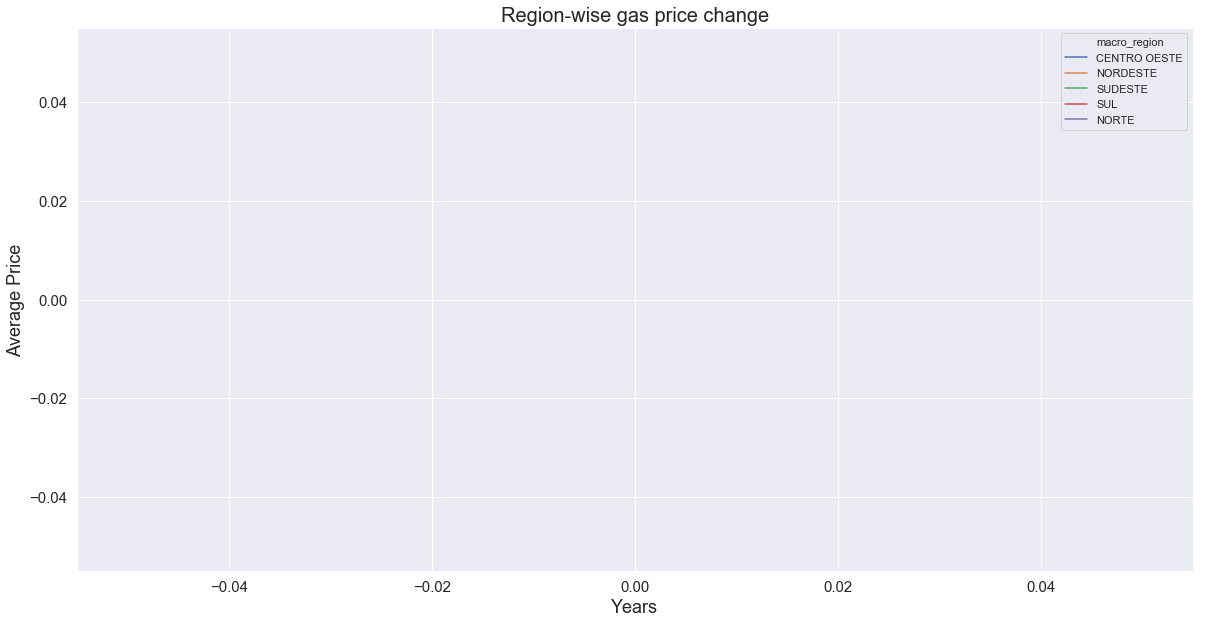

In [44]:
plt.figure(figsize=(20, 10))
sns.lineplot(x='year', y='avg_price', data=df, hue='macro_region')
plt.ylabel('Average Price', fontsize=18)
plt.xlabel('Years', fontsize=18)
plt.title('Region-wise gas price change', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

From the above graph, we incur that from 2004 to 2005, the trend appears to be flat and a little increasing for SUL Region. From 2005 to 2012, there is an increasing trend in gas prices, except for the NORDESTE region, which shows decline. From 2012 to 2013, prices started to decline. After 2013 and onwards, we can see that prices have increased greatly.

## Question 2: Within a region, which states increased more their prices?

In [45]:
df_region_state = df.groupby(['macro_region', 'state'])['avg_price'].median().to_frame()
df_region_state

avg_price
macro_region state                         
CENTRO OESTE DISTRITO FEDERAL           NaN
             GOIAS                      NaN
             MATO GROSSO                NaN
             MATO GROSSO DO SUL         NaN
NORDESTE     ALAGOAS                    NaN
             BAHIA                      NaN
             CEARA                      NaN
             MARANHAO                   NaN
             PARAIBA                    NaN
             PERNAMBUCO                 NaN
             PIAUI                      NaN
             RIO GRANDE DO NORTE        NaN
             SERGIPE                    NaN
NORTE        AMAPA                      NaN
             AMAZONAS                   NaN
             PARA                       NaN
             TOCANTINS                  NaN
SUDESTE      ESPIRITO SANTO             NaN
             MINAS GERAIS               NaN
             RIO DE JANEIRO             NaN
             SAO PAULO                  NaN
SUL          PARANA                     NaN
             RIO GRANDE DO SUL          NaN
             SANTA CATARINA             NaN

In [46]:
df_region_state = df_region_state.reset_index()

for region in list(df_region_state.macro_region.unique()):
    df_temp = df_region_state[df_region_state.macro_region == region][['state', 'avg_price']]
    region_name = region
    state_name = df_temp[df_temp.avg_price == df_temp.avg_price.max()]['state'].iloc[0]
    price = df_temp.avg_price.max()
    print('For region,', region, 'the state,', state_name, 'has increased most in their prices. Average price:', price)
    print()  # Adding a line-space

IndexError: single positional indexer is out-of-bounds

## Question 3: Which states are the cheapest (or most expensive) for different types of fuels?

Let's first check the different kinds of fuel we have.

In [47]:
list(df.product_kind.unique())

['GNV']

Now, let's check how different states are cheapest or most expensive w.r.t the type of fuel.

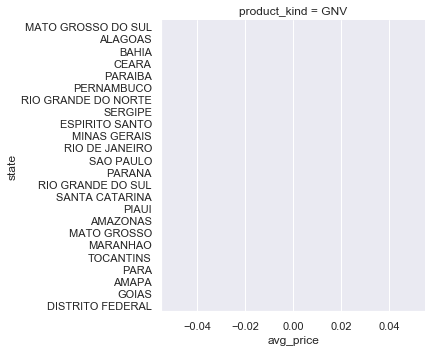

In [48]:
sns.catplot(kind='bar', x='avg_price', y='state', col='product_kind', col_wrap=2, data=df)